# Project: Investigate 'tmdb-movies' Dataset 


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This analysis report will focus on a dataset cleaned from original data on Kaggle. This [dataset](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf) contains information about 10,000 movies collected from The Movie Database (TMDb).

The dataset is composed by entities including:
    1. Movie - which has most of the attributes in the dataset
    2. Genre - List of gernes associated with a given movie. Note that one genre may also be associated with several movies
    3. Cast - List of actors associated with a given movie. Note that on actor may also be associated with several movies
    4. Production Company - Company that produced a given movie
    5. etc.
    
Loking at attributes of each of the entities in the dataset, a number of questions raise for analysis. This analysis will concentrate on the following questions:
    1. Which genres of movies are most popular from year to year?
    2. What are properties associated with movie popularity?


In [2]:
# Importing necessary libraries for this analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [3]:
# Loading data
movies = pd.read_csv('tmdb-movies.csv')
movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
# Looking at the shape of data
movies.shape

(10866, 21)

In [5]:
# Checking if there are duplicated records
sum(movies.duplicated())

1

In [6]:
# Checking for null records
movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
# fixing the release_date attribute data type
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [9]:
movies.id.nunique()

10865

In [10]:
movies.genres.head(5)

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

In [11]:
movies.cast.head()

0    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1    Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2    Shailene Woodley|Theo James|Kate Winslet|Ansel...
3    Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4    Vin Diesel|Paul Walker|Jason Statham|Michelle ...
Name: cast, dtype: object

In [15]:
# How big the dataset could be if separate values and append rows accordingly?
genres_list = list(movies['genres'].str.cat(sep='|').split('|'))
print(len(genres_list))

26960


### Droping extraneous columns, removing rows with null values and dedupe
The dataset has some extraneous colums for our analysis such as imdb_id, homepage, tagline, keywords, etc. We need to drop those colums to ease the analysis.

In [13]:
# Dropping extraneous columns
movies.drop(['id','imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [16]:
# confirming extraneous columns are dropped - number of columns should be less that before
movies.shape

(10866, 13)

In [17]:
# Check for null records after dropping extraneous columns
movies.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [18]:
#Dropping records with null value in any column
movies.dropna(inplace=True)

In [19]:
# checks if any of columns in the dataset have null values 
movies.isnull().sum().any()

False

In [20]:
# checking the number of duplicates in the dataset
print(movies.duplicated().sum())

1


In [21]:
# drop duplicates in the dataset
movies.drop_duplicates(inplace=True)

In [22]:
# see if duplicates in the dataset are dropped
print(movies.duplicated().sum())

0


In [23]:
# viewing the shape of the dataset after all changes made so far
movies.shape

(9772, 13)

<a id='eda'></a>
## Exploratory Data Analysis


### 1. Which genres of movies are most popular from year to year?

#### 1.1. Lets explore genres trend, looking on how given genre has been associated with movies in time

In [24]:
# First we need to know movie release years and sort them.
release_years= movies.release_year.unique()
release_years= np.sort(release_years)
release_years

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

In [25]:
# as the list of release years is long, we may group them in 10 years bunches
years1960To1969 = release_years[:10]
years1970To1979 = release_years[10:20]
years1980To1989 = release_years[20:30]
years1990To1999 = release_years[30:40]
years2000To2010 = release_years[40:50]
years2010To2015 = release_years[50:]

In [26]:
# split attribute by the pipe character and count occurences of each word and return the most frequent
def word_occurence(column_to_split):
    # split the column by pipe character to make a list of words
    words_list = column_to_split.str.cat(sep='|').split('|')
    # make a dataframe using the words list
    words_df = pd.DataFrame({'words' : words_list})
    #count word occurences and pick the the most frequent word
    most_frequent = words_df['words'].value_counts().head(1)
    return most_frequent

In [27]:
# 10 years bunches
bunch_10_year = [years1960To1969, years1970To1979, years1980To1989, years1990To1999, years2000To2010, years2010To2015]
# names of the 10 years bunches
names_10_year_bunch = ['1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2010', '2010-2015']
# creating an empty dataframe, df to hold most frequent movie genre per 10-years bunch period
popular_genres = pd.DataFrame()
index = 0
# for each 10-years bunch, select corresponding movies and find the most frequent movie genre
for b in bunch_10_year:
    # selecting movies corresponding to the 'b' bunch
    bunch = movies[movies.release_year.isin(b)] 
    # use the word_occurence function to find the most frequent movie genre for the bunch
    bunch_most_frequent_genre = pd.DataFrame({'period' : names_10_year_bunch[index],'occurence': word_occurence(bunch.genres)})
     # appending the most frequent genre for the bunch to the popular genres dataframe
    popular_genres = popular_genres.append(bunch_most_frequent_genre)
    index +=1
popular_genres

,period,occurence
Drama,1960-1969,163
Drama,1970-1979,237
Comedy,1980-1989,405
Drama,1990-1999,827
Drama,2000-2010,1427
Drama,2010-2015,1307


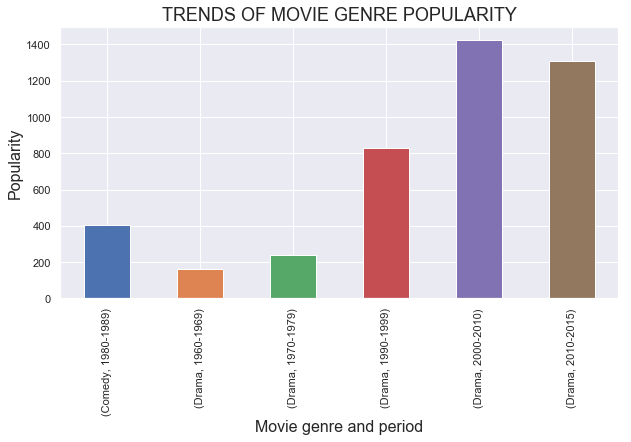

In [28]:
# Plotting the above information in a bar graph
sns.set()
popular_genres.groupby([popular_genres.index, 'period'])['occurence'].sum().plot(kind = 'bar',  figsize = (10, 5))
plt.title('TRENDS OF MOVIE GENRE POPULARITY', fontsize = 18)
plt.xlabel('Movie genre and period', fontsize = 16)
plt.ylabel('Popularity', fontsize = 16);

#### 1.2. Now let see the genre of movies with high popularity

In [29]:
# split attribute by the pipe character
def word_dataframe(column_to_split):
    # split the column by pipe character to make a list of words
    words_list = column_to_split.str.cat(sep='|').split('|')
    # make a dataframe using the words list
    words_df = pd.DataFrame({'words' : words_list})
    return words_df

In [30]:
# next we'll create a column stating the level of popularity according to the 5 number summary show above
movies['popularity_levels'] = pd.cut(movies['popularity'], movies['popularity'].describe()[3:8], \
                                 labels = ['Low', 'Medium', 'Moderately High', 'High'])

In [31]:
# creating a dataframe to hold movies with high popularity
most_popular_movies = movies.query('popularity_levels == "High"')

In [32]:
# counting genres of movies with high popularity 
count_genres = word_dataframe(most_popular_movies.genres).words.value_counts()
count_genres

Drama              963
Comedy             848
Thriller           771
Action             767
Adventure          574
Crime              399
Romance            385
Science Fiction    379
Family             360
Fantasy            334
Horror             235
Animation          232
Mystery            211
War                 75
History             71
Music               65
Western             31
Documentary          4
TV Movie             2
Name: words, dtype: int64

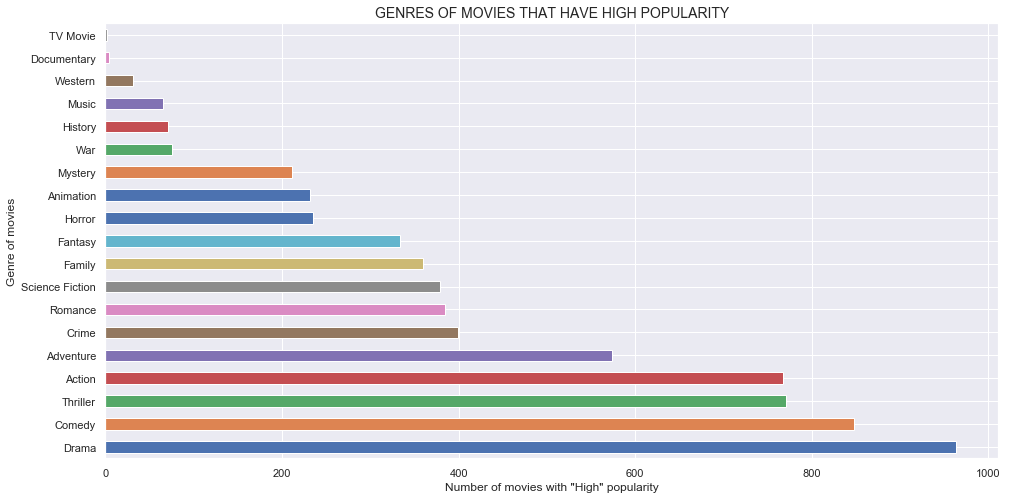

In [33]:
# Plotting the above information in a bar graph
sns.set()
count_genres.plot(kind = 'barh', figsize = (16, 8))
plt.title('GENRES OF MOVIES THAT HAVE HIGH POPULARITY', fontsize = 14)
plt.xlabel('Number of movies with "High" popularity', fontsize = 12)
plt.ylabel('Genre of movies', fontsize = 12);

The above figure shows that the "Drama" genre has the greatest number of movies among those having high popularity. This brings up curitosity to know which genre has more movies with low popularity.

In [34]:
# creating a dataframe to hold movies with low popularity
low_popular_movies = movies.query('popularity_levels == "Low"')

In [35]:
# counting genres of movies with low popularity 
count_genres = word_dataframe(low_popular_movies.genres).words.value_counts()
count_genres

Drama              1029
Comedy              844
Thriller            530
Horror              487
Action              406
Romance             365
Science Fiction     257
Adventure           239
Crime               224
Family              222
Documentary         203
Mystery             173
Fantasy             150
Animation           106
Music               100
Foreign              85
History              67
TV Movie             61
War                  57
Western              39
Name: words, dtype: int64

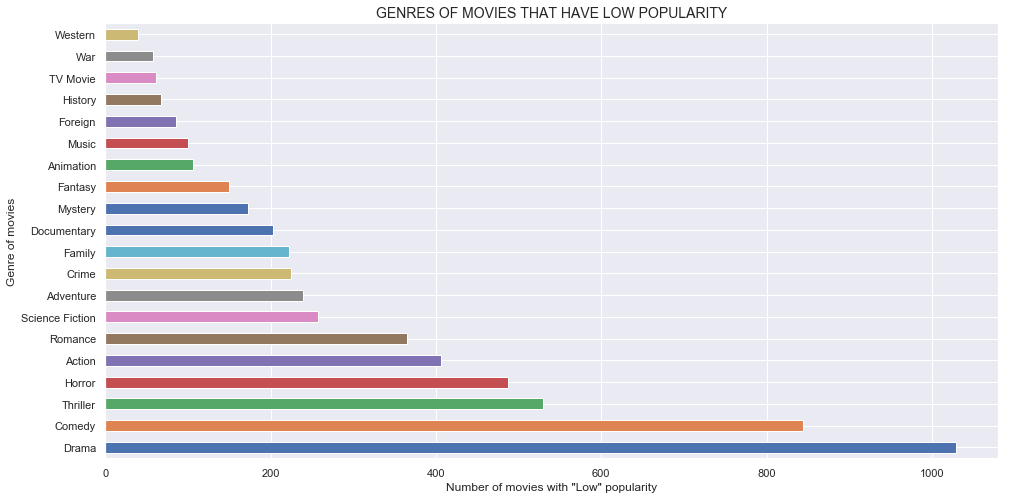

In [36]:
# Plotting the above information in a bar graph
sns.set()
count_genres.plot(kind = 'barh', figsize = (16, 8))
plt.title('GENRES OF MOVIES THAT HAVE LOW POPULARITY', fontsize = 14)
plt.xlabel('Number of movies with "Low" popularity', fontsize = 12)
plt.ylabel('Genre of movies', fontsize = 12);

Again, it looks like 'Drama' genre has more movies with low popularity. Being the genre with most movies with low popularity and at the same time with most movies with high popularity can be justified by the fact that this genre is associated with most movies throughout.

Comparing the above graph with the previous one, we can see that there are genres which are more associated with low popularity than high popularity of movies. This is the case with the 'TV Movie' genre for example.

## 2. What are properties or attributes associated with popularity of movies?
### 2.1. First, lets explore the popularity attribute

In [37]:
# first, let's see some statistics of the popularity attribute
movies.popularity.describe()

count    9772.000000
mean        0.694721
std         1.036931
min         0.000188
25%         0.232710
50%         0.419762
75%         0.776408
max        32.985763
Name: popularity, dtype: float64

In [38]:
movies.query('popularity==0')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,popularity_levels


In [39]:
# now let see how movies are distributed among the above levels of popularity
movies.popularity_levels.value_counts()

High               2443
Moderately High    2443
Medium             2443
Low                2442
Name: popularity_levels, dtype: int64

It looks like popularity of movies is evenly distributed among the four levels of popularity ('Low', 'Medium', 'Moderately High', 'High'). It may be better to check it visually.

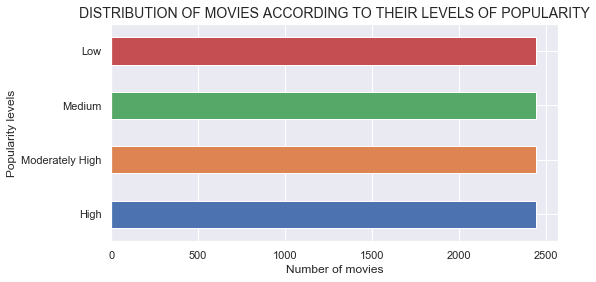

In [40]:
# Plotting the above information in a bar graph
sns.set()
movies.popularity_levels.value_counts().plot(kind = 'barh', figsize = (8, 4))
plt.title('DISTRIBUTION OF MOVIES ACCORDING TO THEIR LEVELS OF POPULARITY', fontsize = 14)
plt.xlabel('Number of movies', fontsize = 12)
plt.ylabel('Popularity levels', fontsize = 12);

### 2.2. Second, lets see what are the attributes that are in strong relationship with the popularity of movies

In [41]:
movies.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
popularity,1.000000,0.538921,0.662405,0.156290,0.802956,0.239121,0.110944
budget,0.538921,1.000000,0.731204,0.214292,0.627068,0.096051,0.138239
revenue,0.662405,0.731204,1.000000,0.183293,0.788533,0.192026,0.071738
runtime,0.156290,0.214292,0.183293,1.000000,0.184285,0.193973,-0.133793
vote_count,0.802956,0.627068,0.788533,0.184285,1.000000,0.279851,0.124726
vote_average,0.239121,0.096051,0.192026,0.193973,0.279851,1.000000,-0.140046
release_year,0.110944,0.138239,0.071738,-0.133793,0.124726,-0.140046,1.000000


The table above shows that popularity attribute is in strong correlation with budget, revenue and vote_count attributes. We are going to visualize these relationships using plots

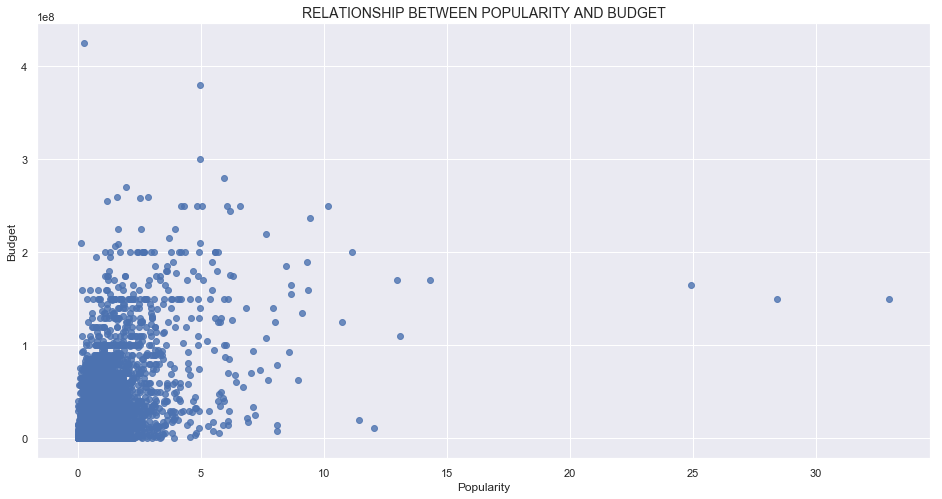

In [44]:
# plotting relationship between popularity and budget
x = movies.popularity
y = movies.budget

sns.regplot(x, y, fit_reg = False)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

plt.title('RELATIONSHIP BETWEEN POPULARITY AND BUDGET', fontsize = 14)
plt.xlabel('Popularity')
plt.ylabel('Budget')
plt.show()

Looking at the above plot, one can wonder if this relationship has been persistent as time goes by.

In [45]:
movies_with_budget = movies.query('budget > 0')
movies_with_budget.shape

(5021, 14)

In [47]:
# creating an empty dataframe, df to hold most frequent movie genre per 10-years bunch period
movies_budget_levels = pd.DataFrame()
index = 0
# for each 10-years bunch, select corresponding movies and find the most frequent movie genre
for b in bunch_10_year:
    # selecting movies corresponding to the 'b' bunch
    bunch = movies_with_budget[movies_with_budget.release_year.isin(b)] 
     # adding fields to the dataframe
    bunch['budget_levels'] = pd.cut(bunch['budget'], bunch['budget'].describe()[3:8], \
                                 labels = ['Low', 'Medium', 'Moderately High', 'High'])
    bunch['bunch_10_year'] = names_10_year_bunch[index].replace('-','To')
    movies_budget_levels = movies_budget_levels.append(bunch)
    index +=1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [48]:
movies_budget_levels_summary = movies_budget_levels.groupby(['bunch_10_year','budget_levels']).median()

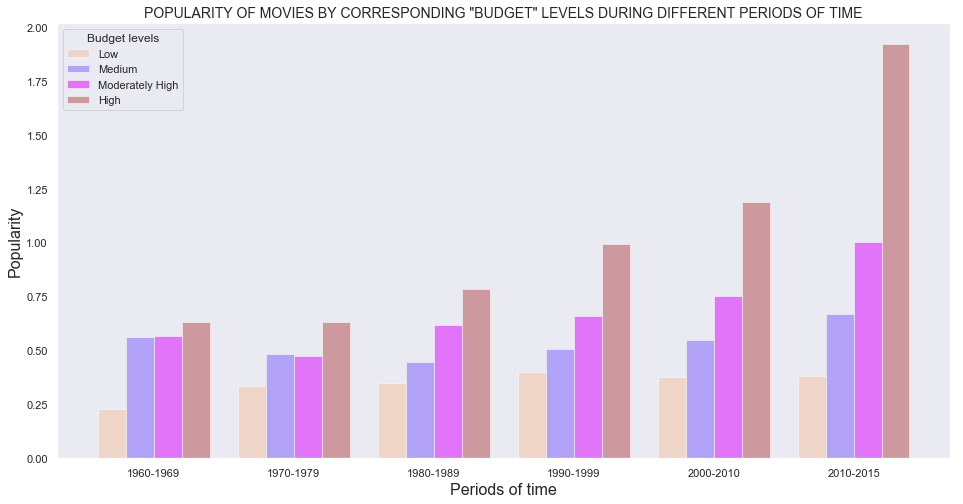

In [49]:
# defining bars positions and width
pos = list(range(len(movies_budget_levels_summary.query('budget_levels =="Low"'))))
width = 0.2 

# plotting bars
fig, ax = plt.subplots(figsize=(16,8))

# bars for 'Low' data
plt.bar(pos, movies_budget_levels_summary.query('budget_levels =="Low"')['popularity'], width, alpha=0.5, color='#f2c29e',
        label= 'Low')
# bars for 'Medium' data
plt.bar([p + width for p in pos], movies_budget_levels_summary.query('budget_levels =="Medium"')['popularity'], width, 
        alpha=0.5, color='#7c5dff', label= 'Medium')
# bars for 'Moderately High' data
plt.bar([p + width*2 for p in pos], movies_budget_levels_summary.query('budget_levels =="Moderately High"')['popularity'], 
        width, alpha=0.5, color='#d900ff', label='Moderately High')
# bars for 'High' data
plt.bar([p + width*3 for p in pos], movies_budget_levels_summary.query('budget_levels =="High"')['popularity'], 
        width, alpha=0.5, color='#b2474c', label='High')


# axis labels
ax.set_ylabel('Popularity', fontsize = 16)
ax.set_xlabel('Periods of time', fontsize = 16)

# title
ax.set_title('POPULARITY OF MOVIES BY CORRESPONDING "BUDGET" LEVELS DURING DIFFERENT PERIODS OF TIME', fontsize = 14)

# x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# x ticks labels
ax.set_xticklabels(['1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2010', '2010-2015'])

# legend
plt.legend( title= "Budget levels", loc='upper left')
plt.grid()
plt.show()

The above chart seems to show that consistantly the popularity of movies has been high as the *__budget__* was high.

#### Looking at relationship between popularity and revenue

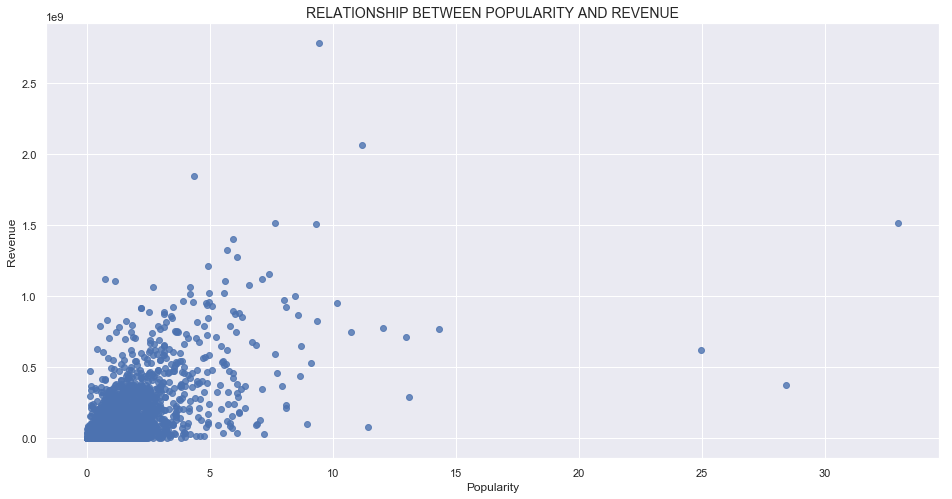

In [50]:
# plotting relationship between popularity and revenue
x = movies.popularity
y = movies.revenue

sns.regplot(x, y, fit_reg = False)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

plt.title('RELATIONSHIP BETWEEN POPULARITY AND REVENUE', fontsize = 14)
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

In [51]:
movies_with_revenue = movies.query('revenue > 0')
movies_with_revenue.shape

(4750, 14)

In [52]:
# creating an empty dataframe, df to hold most frequent movie genre per 10-years bunch period
movies_revenue_levels = pd.DataFrame()
index = 0
# for each 10-years bunch, select corresponding movies and find the most frequent movie genre
for b in bunch_10_year:
    # selecting movies corresponding to the 'b' bunch
    bunch = movies_with_revenue[movies_with_revenue.release_year.isin(b)] 
     # adding fields to the dataframe
    bunch['revenue_levels'] = pd.cut(bunch['revenue'], bunch['revenue'].describe()[3:8], \
                                 labels = ['Low', 'Medium', 'Moderately High', 'High'])
    bunch['bunch_10_year'] = names_10_year_bunch[index].replace('-','To')
    movies_revenue_levels = movies_revenue_levels.append(bunch)
    index +=1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [53]:
movies_revenue_levels_summary = movies_revenue_levels.groupby(['bunch_10_year','revenue_levels']).median()

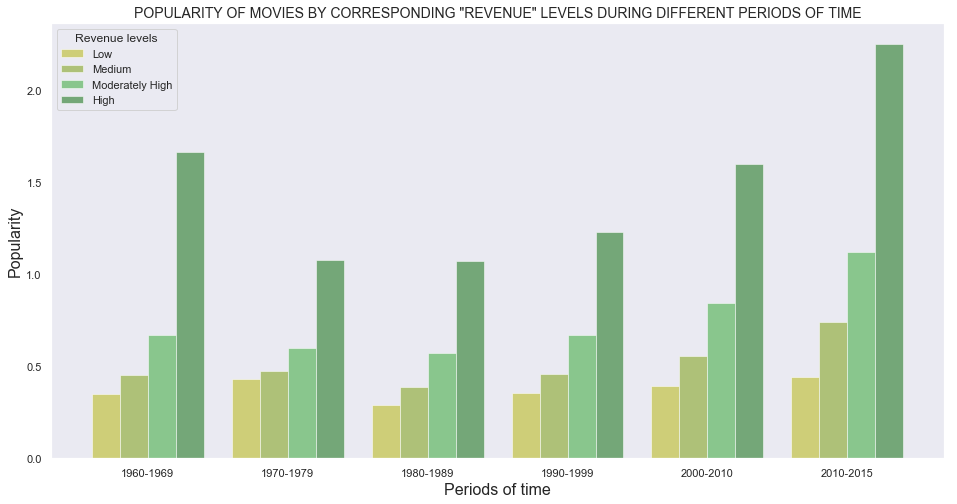

In [54]:
# defining bars positions and width
pos = list(range(len(movies_revenue_levels_summary.query('revenue_levels =="Low"'))))
width = 0.2 

# plotting bars
fig, ax = plt.subplots(figsize=(16,8))

# bars for 'Low' data
plt.bar(pos, movies_revenue_levels_summary.query('revenue_levels =="Low"')['popularity'], width, alpha=0.5, color='#b3b300',
        label= 'Low')
# bars for 'Medium' data
plt.bar([p + width for p in pos], movies_revenue_levels_summary.query('revenue_levels =="Medium"')['popularity'], width, 
        alpha=0.5, color='#739900', label= 'Medium')
# bars for 'Moderately High' data
plt.bar([p + width*2 for p in pos], movies_revenue_levels_summary.query('revenue_levels =="Moderately High"')['popularity'], 
        width, alpha=0.5, color='#29a329', label='Moderately High')
# bars for 'High' data
plt.bar([p + width*3 for p in pos], movies_revenue_levels_summary.query('revenue_levels =="High"')['popularity'], 
        width, alpha=0.5, color='#006600', label='High')


# axis labels
ax.set_ylabel('Popularity', fontsize = 16)
ax.set_xlabel('Periods of time', fontsize = 16)

# title
ax.set_title('POPULARITY OF MOVIES BY CORRESPONDING "REVENUE" LEVELS DURING DIFFERENT PERIODS OF TIME', fontsize = 14)

# x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# x ticks labels
ax.set_xticklabels(['1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2010', '2010-2015'])

# legend
plt.legend( title = "Revenue levels", loc='upper left')
plt.grid()
plt.show()

The above chart seems to show that consistantly the popularity of movies has been high as the *__revenue__* was high.

#### Looking at relationship between popularity and  vote count

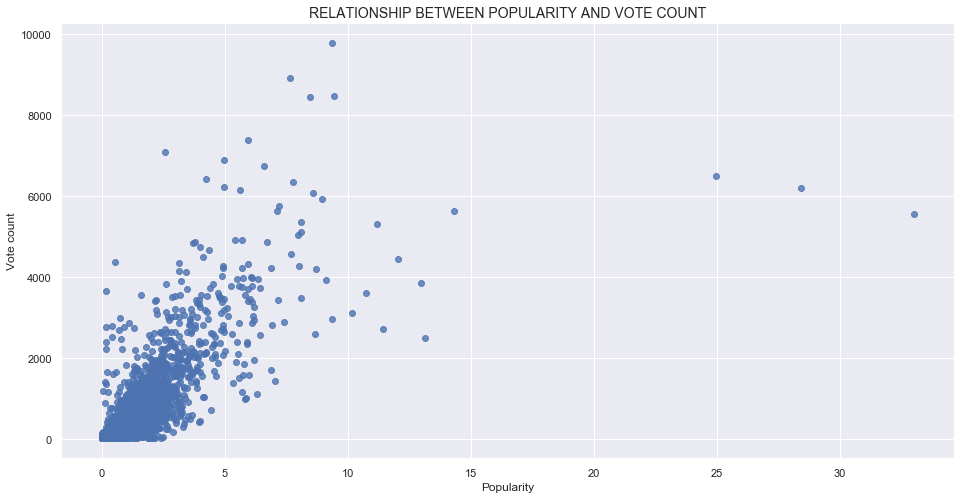

In [55]:
# plotting relationship between popularity and vote counts
x = movies.popularity
y = movies.vote_count

sns.regplot(x, y, fit_reg = False)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

plt.title('RELATIONSHIP BETWEEN POPULARITY AND VOTE COUNT', fontsize = 14)
plt.xlabel('Popularity')
plt.ylabel('Vote count')
plt.show()

In [56]:
movies_with_vote_count = movies.query('vote_count > 0')
movies_with_vote_count.shape

(9772, 14)

In [57]:
# creating an empty dataframe to hold movies with vote count levels
movies_vote_count_levels = pd.DataFrame()
index = 0
# for each 10-years bunch, select corresponding movies and find the most frequent movie genre
for b in bunch_10_year:
    # selecting movies corresponding to the 'b' bunch
    bunch = movies_with_vote_count[movies_with_vote_count.release_year.isin(b)] 
     # adding fields to the dataframe
    bunch['vote_count_levels'] = pd.cut(bunch['vote_count'], bunch['vote_count'].describe()[3:8], \
                                 labels = ['Low', 'Medium', 'Moderately High', 'High'])
    bunch['bunch_10_year'] = names_10_year_bunch[index].replace('-','To')
    movies_vote_count_levels = movies_vote_count_levels.append(bunch)
    index +=1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [59]:
movies_vote_count_levels_summary = movies_vote_count_levels.groupby(['bunch_10_year','vote_count_levels']).median()

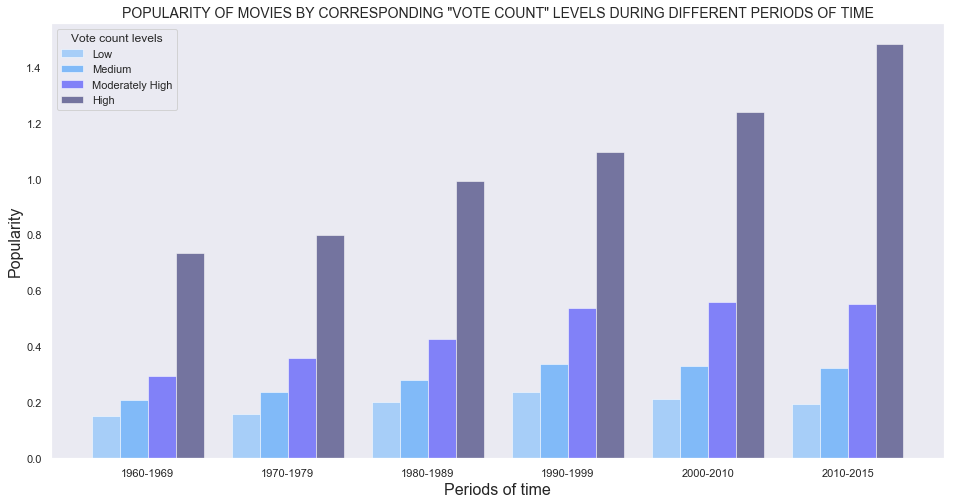

In [60]:
# defining bars positions and width
pos = list(range(len(movies_vote_count_levels_summary.query('vote_count_levels =="Low"'))))
width = 0.2 

# plotting bars
fig, ax = plt.subplots(figsize=(16,8))

# bars for 'Low' data
plt.bar(pos, movies_vote_count_levels_summary.query('vote_count_levels =="Low"')['popularity'], width, alpha=0.5, color='#66b3ff',
        label= 'Low')
# bars for 'Medium' data
plt.bar([p + width for p in pos], movies_vote_count_levels_summary.query('vote_count_levels =="Medium"')['popularity'], width, 
        alpha=0.5, color='#1a8cff', label= 'Medium')
# bars for 'Moderately High' data
plt.bar([p + width*2 for p in pos], movies_vote_count_levels_summary.query('vote_count_levels =="Moderately High"')['popularity'], 
        width, alpha=0.5, color='#1a1aff', label='Moderately High')
# bars for 'High' data
plt.bar([p + width*3 for p in pos], movies_vote_count_levels_summary.query('vote_count_levels =="High"')['popularity'], 
        width, alpha=0.5, color='#00004d', label='High')


# axis labels
ax.set_ylabel('Popularity', fontsize = 16)
ax.set_xlabel('Periods of time', fontsize = 16)

# title
ax.set_title('POPULARITY OF MOVIES BY CORRESPONDING "VOTE COUNT" LEVELS DURING DIFFERENT PERIODS OF TIME', fontsize = 14)

# x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# x ticks labels
ax.set_xticklabels(['1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2010', '2010-2015'])

# legend
plt.legend( title = "Vote count levels", loc='upper left')
plt.grid()
plt.show()

The above chart seems to show that consistantly the popularity of movies has been high as the *__vote count__* was high.

<a id='conclusions'></a>
## Conclusions


__Trend of movie genres popularity__

   * The first research question dealing with the trend of movie genres seems to show that the 'Drama' genre has been increasengly associated with most of movies throughout. Though the 'Comedy' genre rose in 1980s, 'Drama' genre seem to dominate thereafter.
   
   * It looks like 'Drama' genre of movies is associated with both most of movies with high popularity and those with low popularity. This can be justified by the fact that 'Drama' genre is associated with most of movies throughout.
    
    
__Properties associated with movies popularity__

   * Checking how the popularity attribute values are distributed among movies, it looks like the number of movies with high popularity is equal to number of movies with moderately high popularity and is equal to the number of movies with medium popularity and is 2443. The number of movies with low pupularity is 2442.
   
   * The table of correlation and different scatter plots show that there is strong relationship between popularity and following properties:
       * budget --> 0.54
       * revenue --> 0.66
       * vote_count --> 0.8
       
   * When we look at relationship of popularity and budget in time, it seems like movies having bigger budget had also higher popularity throughout the time. This is also true for the revenue and vote_count properties.  
   
__Some limitations__
* Fields with multipe values: As stated by the author of the dataset, there are some fields containing multiple values, namely: cast and genres. This is a problem of database normalization. If we try to separate these values only for the genre field, we end up with a dataset of more than 26000 rows with duplicated values in all other fields. Doing the same for the cast column will food the dataset even more. The best solution maybe is to separate the two fields in their corresponding small datasets containing unique values for genre and cast respectively. But even then, other datasets will be needed to be able to join genres and cast to the main dataset. For the simplicity of our data analysis we avoided to undergo this whole process. This is why we just count occurences of given gerne to see its trend and popularity over time.

* Time constaint: Investigating this dataset opens up so many questions which could be asnswered using data therein. These questions may range from the profitability of movie to best directors or actors or even production companies ... I wish we were given a set of questions to choose from. But again, for the simplicity of this work, we concentrated only on two questions.